In [1]:
import cv2

In [2]:
img_cat = cv2.imread('cat.jpeg')

In [3]:
import matplotlib.pyplot as plt 

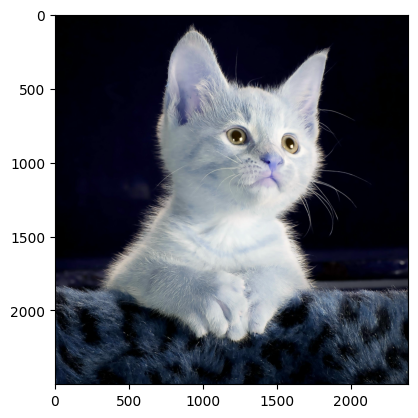

In [4]:
plt.imshow(img_cat)

In [5]:
img_dog = cv2.imread('dog.jpeg')

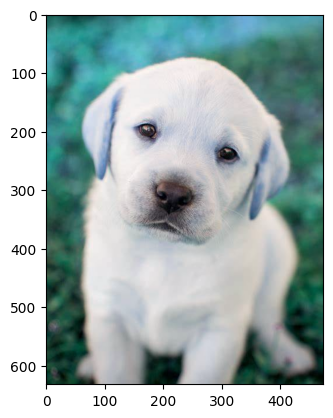

In [6]:
plt.imshow(img_dog)

In [7]:
import tensorflow as tf

In [8]:
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [9]:
import numpy as np
import pandas as pd

### making generator to manage ram 

In [10]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size =  30,
    image_size=(300,300)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size =  30,
    image_size=(300,300)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [11]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
validation_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

### Normalization of image 

In [13]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [14]:
train_ds,validation_ds

(<MapDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <MapDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

## Creating model 

In [15]:
model = Sequential()

In [16]:
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(300,300,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())


model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

## Model summary

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 298, 298, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 147, 147, 64)     256       
 hNormalization)                                                 
                                                        

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
hist = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
667/667 [==============================] - 178s 255ms/step - loss: 1.5498 - accuracy: 0.5684 - val_loss: 0.6573 - val_accuracy: 0.6186
Epoch 2/10
667/667 [==============================] - 169s 254ms/step - loss: 0.6647 - accuracy: 0.6073 - val_loss: 0.7027 - val_accuracy: 0.5306
Epoch 3/10
667/667 [==============================] - 168s 251ms/step - loss: 0.6158 - accuracy: 0.6694 - val_loss: 0.5930 - val_accuracy: 0.6864
Epoch 4/10
667/667 [==============================] - 169s 253ms/step - loss: 0.5568 - accuracy: 0.7246 - val_loss: 0.6007 - val_accuracy: 0.6798
Epoch 5/10
667/667 [==============================] - 170s 255ms/step - loss: 0.5235 - accuracy: 0.7464 - val_loss: 0.6151 - val_accuracy: 0.6818
Epoch 6/10
667/667 [==============================] - 169s 253ms/step - loss: 0.4783 - accuracy: 0.7713 - val_loss: 0.5075 - val_accuracy: 0.7496
Epoch 7/10
667/667 [==============================] - 169s 253ms/step - loss: 0.4375 - accuracy: 0.7890 - val_loss: 0.5744 -

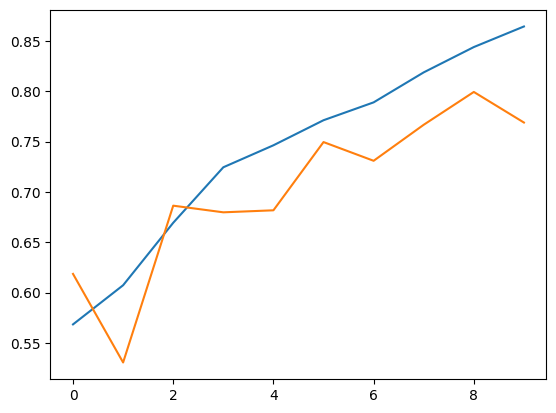

In [21]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

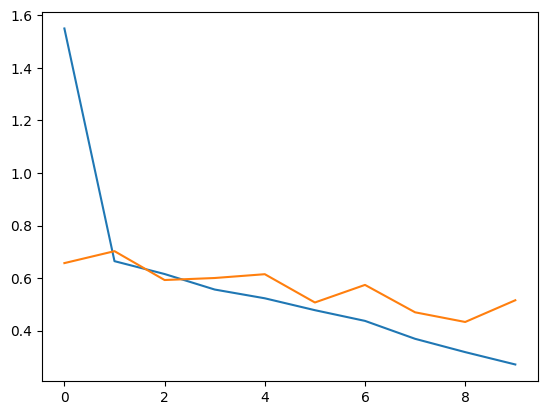

In [23]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [ ]:
### Testi

In [121]:
img_dog = cv2.imread('dog3.jpeg')

In [122]:
img_cat = cv2.imread('cat3.jpeg')

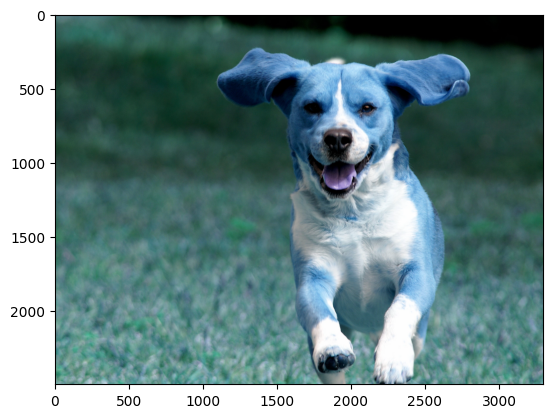

In [123]:
plt.imshow(img_dog)

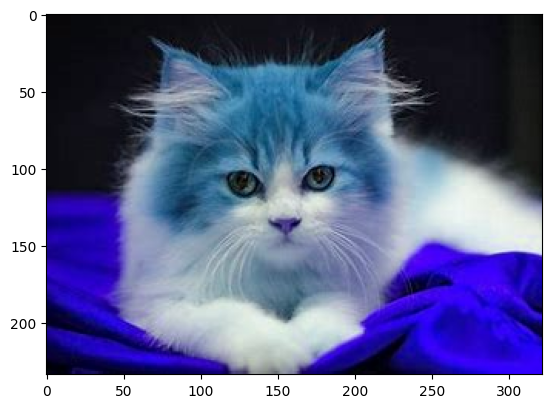

In [124]:
plt.imshow(img_cat)

In [130]:
test_img = cv2.resize(img_cat,(300,300))

In [131]:
test_input = test_img.reshape((1,300,300,3))

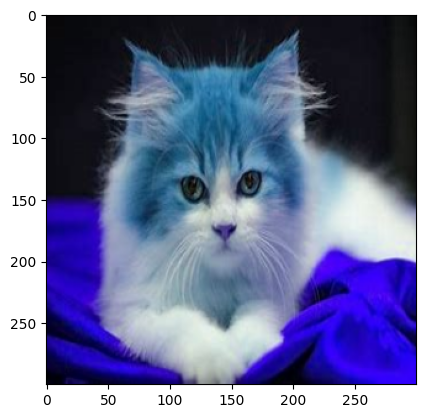

In [132]:
plt.imshow(test_img)

In [133]:
test_image = tf.cast(test_input/255. ,tf.float32)

In [134]:
round(np.max(model.predict(test_image)))

1/1 [==============================] - 0s 21ms/step


0

## 1 is for Dog
## 0 is for Cat